# Import des librairies nécessaires 

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split


# Sommaire

1. partition du dataset (train, test) --> Done
2. best feature
2. KNeighbors

## Partition

In [17]:
data = pd.read_csv("fetal_health.csv")

data.fetal_health = pd.Categorical(data.fetal_health, categories=[1.0, 2.0, 3.0], ordered=True)

In [18]:
data_non_ordinal = data = pd.read_csv("fetal_health.csv")

In [19]:
# Création de deux DF (un de labels et un de données)
labels = data.fetal_health
clean_data = data.drop('fetal_health', axis=1)


In [20]:
print(clean_data.shape)
print(labels.shape)

(2126, 21)
(2126,)


Les dimensions sont cohérentes

In [21]:
data_train, data_test, labels_train, labels_test = train_test_split(clean_data, labels, test_size=0.2, random_state=123, shuffle=True, stratify=labels)


Création d'une partition des données avec une proportion 80/20, random state spécifié pour avoir la même partition à chauqe appel, stratify= labels pour conserver les proportions de nos labels 

In [22]:
labels_train
labels_test

915     1.0
339     3.0
1925    1.0
1277    1.0
1585    1.0
       ... 
1536    1.0
1735    1.0
454     1.0
69      1.0
1557    1.0
Name: fetal_health, Length: 426, dtype: float64

## Best feature

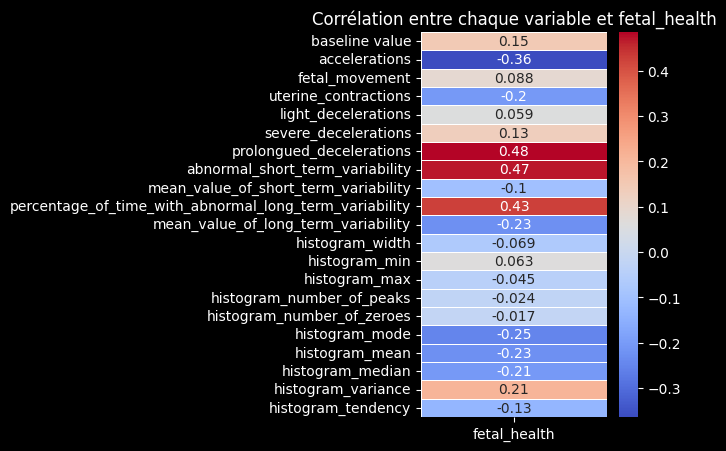

In [23]:
correlation_data = data_non_ordinal.corr()['fetal_health']

# Créez un DataFrame à partir de la série de corrélation
correlation_df = pd.DataFrame(correlation_data)
correlation_df = correlation_df.drop('fetal_health')

# Tracez la heatmap de la corrélation
plt.figure(figsize=(3, 5))
plt.grid(False)
sns.heatmap(correlation_df, cmap='coolwarm', linewidths=0.5, annot=True, )
plt.title('Corrélation entre chaque variable et fetal_health')
plt.show()

On remarque que les variables "accelerations","prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" et "mean_value_of_long_term_variability" sont celles qui sont le plus corrélé  à la santé du foetus

Nous allons regarder avec d'autres méthodes si ce sont les best features à utiliser

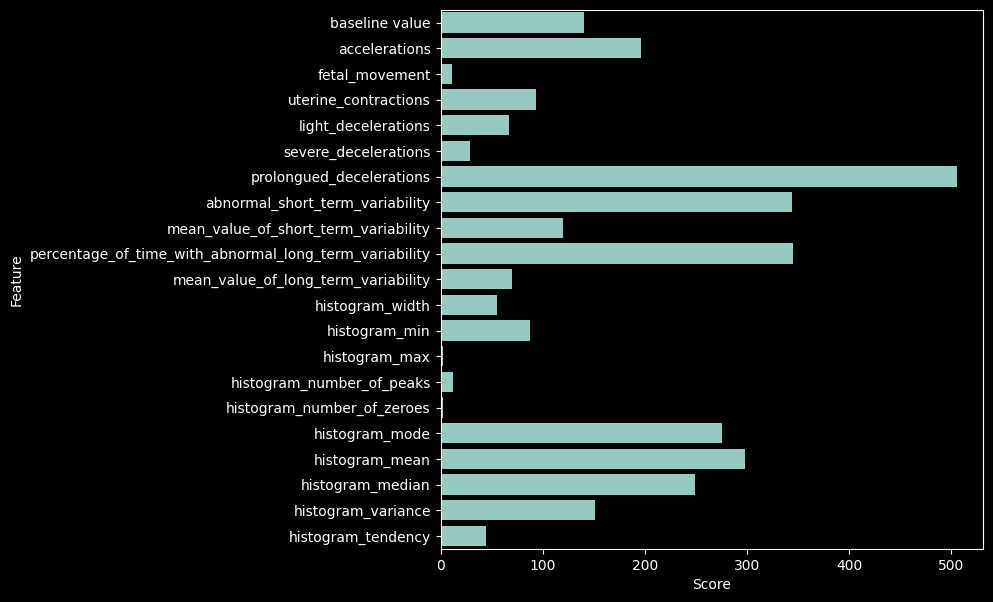

In [24]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

X= clean_data
Y=data['fetal_health']

# f_classif correspond a un test d'anova
bestfeatures = SelectKBest(score_func=f_classif, k='all')

fit = bestfeatures.fit(X,Y)

# résultats 
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 

#Visualize the feature scores
fig, ax=plt.subplots(figsize=(7,7))
plot=sns.barplot(data=featureScores, x='Score', y='Feature',linewidth=0.5, orient='h')


En faisant ce test nous réalisons une analyse de la variance entre chaque variable et nos labels. Avec cela nous calculons un score qui montre les variables qui ont eu le meilleur "score" sur le test.

In [25]:
# On selectionne les variables avec un score >= 200
selection=list(featureScores[featureScores['Score']>=200]['Feature'])
selection.append('fetal_health')

# On crée un nouveau dataset avec les variables qui nous intéressent
data_selected=data[selection]
data_selected.head()

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mode,histogram_mean,histogram_median,fetal_health
0,0.0,73.0,43.0,120.0,137.0,121.0,2.0
1,0.0,17.0,0.0,141.0,136.0,140.0,1.0
2,0.0,16.0,0.0,141.0,135.0,138.0,1.0
3,0.0,16.0,0.0,137.0,134.0,137.0,1.0
4,0.0,16.0,0.0,137.0,136.0,138.0,1.0


In [26]:
score_features = featureScores[featureScores['Score']>=200]

In [27]:
score_features

,Feature,Score
6,prolongued_decelerations,505.853206
7,abnormal_short_term_variability,343.820419
9,percentage_of_time_with_abnormal_long_term_var...,345.156385
16,histogram_mode,275.117696
17,histogram_mean,297.625497
18,histogram_median,248.772237


On voit que les variables sélectionnées sont en parties communes à celles montrées auparavant

In [28]:
# Création de deux DF (un de labels et un de données)
labels_selected = data_selected.fetal_health
clean_data_selected = data_selected.drop('fetal_health', axis=1)

data_train_selected, data_test_selected, labels_train_selected, labels_test_selected = train_test_split(clean_data_selected, labels_selected, test_size=0.2, random_state=123, shuffle=True, stratify=labels_selected)


## KNeighbors (sans selection des var)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
clf = KNeighborsClassifier()
clf.fit(data_train, labels_train)
prediction = clf.predict(data_test)

In [31]:
prediction

array([1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 2., 1., 3., 1., 1., 1., 1., 2., 1., 3., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 3., 1., 1., 2., 1., 1.,
       1., 1., 1., 2., 1., 3., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 3., 1., 1., 3., 3., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 2., 1., 1., 3., 1., 2., 1., 3., 1., 2., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 3., 1.,
       1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1.,
       2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 2.

In [32]:
prediction = pd.Categorical(prediction, categories=[1.0, 2.0, 3.0], ordered=True)

In [33]:
print("Accuracy pour globale")
print(f"Score données d'entrainements: {clf.score(data_train, labels_train)}")
print(f"Score données de test: {clf.score(data_test, labels_test)}")

Accuracy pour globale
Score données d'entrainements: 0.9188235294117647
Score données de test: 0.8849765258215962


In [34]:
print("Accuracy pour les labels 3")
print(f"Score données d'entrainements: {clf.score(data_train[labels_train == 3], labels_train[labels_train == 3])}")
print(f"Score données de test: {clf.score(data_test[labels_test == 3], labels_test[labels_test == 3])}")

Accuracy pour les labels 3
Score données d'entrainements: 0.8156028368794326
Score données de test: 0.7428571428571429


In [35]:
print("Accuracy pour les labels 2")
print(f"Score données d'entrainements: {clf.score(data_train[labels_train == 2], labels_train[labels_train == 2])}")
print(f"Score données de test: {clf.score(data_test[labels_test == 2], labels_test[labels_test == 2])}")


Accuracy pour les labels 2
Score données d'entrainements: 0.6864406779661016
Score données de test: 0.559322033898305


In [36]:
print("Accuracy pour les labels 1")
print(f"Score données d'entrainements: {clf.score(data_train[labels_train == 1], labels_train[labels_train == 1])}")
print(f"Score données de test: {clf.score(data_test[labels_test == 1], labels_test[labels_test == 1])}")

Accuracy pour les labels 1
Score données d'entrainements: 0.9712773998488284
Score données de test: 0.9578313253012049


On réalise donc un K plus proches voisins (k=5) sur l'ensemble d'entrainement et nous utilisons ce modèle (clf) pour prédire les data de tests. En calculant les scores (proportions de bonnes prédictions) nous avons 92% et 89% pour les préditctions de test. La prédisction est donc bonne et se fénéralise bien à de nouvelles données (pas d'overfitting). 

Par contre en regardant le score pour chaque classe, on remarque que celui-ci est très bon pour la classe 1 mais beaucoup moins bon pour la classe 2 et 3

In [37]:
from sklearn.decomposition import PCA
import plotly.express as px

# Réaliser l'analyse en composantes principales (PCA)
cls = PCA(n_components=21)
pcs = cls.fit_transform(data_test)

# Créer la première figure avec un titre
fig_original = px.scatter(x=pcs.T[0], y=pcs.T[1], color=labels_test, 
                          labels={'x': 'PC1', 'y': 'PC2'}, width=650)
fig_original.update_layout(title="Original PCA (2D)")

# Créer la deuxième figure avec un titre
fig_KNeighbors = px.scatter(x=pcs.T[0], y=pcs.T[1], color=prediction, 
                            labels={'x': 'PC1', 'y': 'PC2'}, width=650)
fig_KNeighbors.update_layout(title="KNeighbors PCA (2D)")

# Afficher les figures
fig_original.show()
fig_KNeighbors.show()



In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(labels_test, prediction, target_names=['Normal', 'Suspect', 'Pathologic']))

              precision    recall  f1-score   support

      Normal       0.91      0.96      0.93       332
     Suspect       0.67      0.56      0.61        59
  Pathologic       0.93      0.74      0.83        35

    accuracy                           0.88       426
   macro avg       0.84      0.75      0.79       426
weighted avg       0.88      0.88      0.88       426



## KNeighbors (avec selection des var)

In [40]:
data_test_selected
data_train_selected

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mode,histogram_mean,histogram_median
1624,0.000,53.0,0.0,135.0,134.0,140.0
53,0.000,61.0,40.0,154.0,152.0,154.0
1082,0.000,28.0,2.0,144.0,141.0,144.0
1963,0.002,61.0,0.0,125.0,95.0,103.0
1132,0.000,16.0,0.0,107.0,115.0,115.0
...,...,...,...,...,...,...
1070,0.000,16.0,0.0,131.0,138.0,136.0
396,0.000,51.0,9.0,145.0,147.0,148.0
194,0.000,56.0,19.0,153.0,157.0,158.0
630,0.000,48.0,0.0,160.0,150.0,155.0


### Sélection du k opt

In [41]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.utils import check_X_y
import numpy as np

def knn_cross_validation2(X, y, n_folds, n_neighbors_list):
    # Vérifier et valider les entrées X et y
    X, y = check_X_y(X, y)
    
    # Initialiser le KFold
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    # Générateur pour produire les scores de validation croisée pour chaque n_neighbors
    for n_neighbors in n_neighbors_list:
        # Initialiser le modèle KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        # Calculer les scores de validation croisée
        scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
        # Renvoyer les scores pour la valeur actuelle de n_neighbors
        yield n_neighbors, scores

In [42]:
n_folds = 10
n_neighbors_list = np.unique(np.round(np.geomspace(1, 500, 100)).astype(int))

gen = knn_cross_validation2(data_train_selected, labels_train_selected, n_folds, n_neighbors_list)
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy"])

In [43]:
# Calculer l'accuracy moyenne pour chaque ligne
df['mean_accuracy'] = df['accuracy'].apply(lambda acc_list: sum(acc_list) / len(acc_list))

# Trouver le nombre de voisins avec l'accuracy moyenne maximale
max_mean_accuracy = df['mean_accuracy'].max()
best_n_neighbors = df.loc[df['mean_accuracy'] == max_mean_accuracy, '# neighbors'].values[0]

print(f"Le meilleur nombre de voisins est: {best_n_neighbors} avec une accuracy moyenne de: {max_mean_accuracy:.4f}")


Le meilleur nombre de voisins est: 3 avec une accuracy moyenne de: 0.9112


### Knn avec kopt

In [44]:
clf_selected = KNeighborsClassifier(n_neighbors=best_n_neighbors)
clf_selected.fit(data_train_selected, labels_train_selected)
prediction_selected = clf_selected.predict(data_test_selected)

In [45]:
prediction_selected = pd.Categorical(prediction_selected, categories=[1.0, 2.0, 3.0], ordered=True)

In [46]:
print("Accuracy pour globale")
print(f"Score données d'entrainements: {clf_selected.score(data_train_selected, labels_train_selected)}")
print(f"Score données de test: {clf_selected.score(data_test_selected, labels_test_selected)}")

Accuracy pour globale
Score données d'entrainements: 0.9470588235294117
Score données de test: 0.9014084507042254


In [47]:
print("Accuracy pour les labels 3")
print(f"Score données d'entrainements: {clf_selected.score(data_train_selected[labels_train_selected == 3], labels_train_selected[labels_train_selected == 3])}")
print(f"Score données de test: {clf_selected.score(data_test_selected[labels_test_selected == 3], labels_test_selected[labels_test_selected == 3])}")

Accuracy pour les labels 3
Score données d'entrainements: 0.8794326241134752
Score données de test: 0.7428571428571429


In [48]:
print("Accuracy pour les labels 2")
print(f"Score données d'entrainements: {clf_selected.score(data_train_selected[labels_train_selected == 2], labels_train_selected[labels_train_selected == 2])}")
print(f"Score données de test: {clf_selected.score(data_test_selected[labels_test_selected == 2], labels_test_selected[labels_test_selected == 2])}")

Accuracy pour les labels 2
Score données d'entrainements: 0.7838983050847458
Score données de test: 0.6779661016949152


In [49]:
print("Accuracy pour les labels 1")
print(f"Score données d'entrainements: {clf_selected.score(data_train_selected[labels_train_selected == 1], labels_train_selected[labels_train_selected == 1])}")
print(f"Score données de test: {clf_selected.score(data_test_selected[labels_test_selected == 1], labels_test_selected[labels_test_selected == 1])}")

Accuracy pour les labels 1
Score données d'entrainements: 0.983371126228269
Score données de test: 0.9578313253012049


En réduisant le nombre de variables nous évitons le fléau de la dimension et nous améliorons donc significativement le résultat de nos prédictions. Par exemple les prédictions du label 3 pour nos données de test passent de 74% à 87% d'accuracy

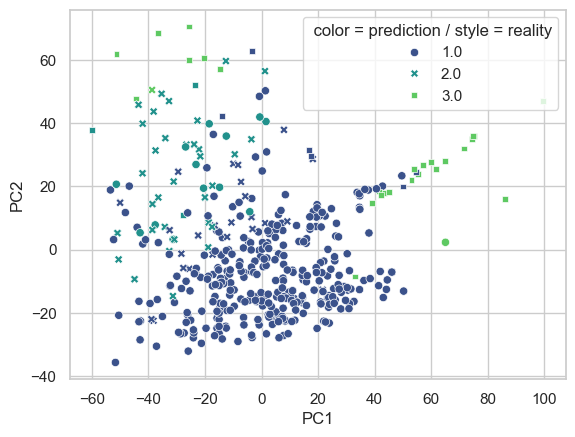

In [66]:

sns.set(style="whitegrid")

# Convertir les labels en catégoriels ordonnés
labels_test_selected_ordinal = pd.Categorical(labels_test_selected, categories=[1.0, 2.0, 3.0], ordered=True)

# Appliquer la PCA sur les données de test sélectionnées
cls = PCA(n_components=6)
pcs = cls.fit_transform(data_test_selected)

# Assurer que 'prediction' est un array numpy ou une série pandas pour l'utilisation des couleurs
# Exemple : prediction = np.array([0, 1, 2, ...])  # Remplacer par vos données de prédiction

# Créer le scatter plot avec Seaborn
fig_KNeighbors = sns.scatterplot(x=pcs[:, 0], y=pcs[:, 1], hue=prediction, style=labels_test_selected_ordinal, palette='viridis')

# Ajouter les labels pour les axes
fig_KNeighbors.legend(title=' color = prediction / style = reality')
fig_KNeighbors.set_xlabel('PC1')
fig_KNeighbors.set_ylabel('PC2')

# Afficher la figure
plt.show()


In [58]:
from utils import add_decision_boundary, scatterplot_pca, plot_clustering

In [29]:
from sklearn.metrics import classification_report

print(classification_report(labels_test_selected, prediction_selected, target_names=['Normal', 'Suspect', 'Pathologic']))

              precision    recall  f1-score   support

      Normal       0.94      0.96      0.95       332
     Suspect       0.70      0.68      0.69        59
  Pathologic       0.90      0.74      0.81        35

    accuracy                           0.90       426
   macro avg       0.84      0.79      0.82       426
weighted avg       0.90      0.90      0.90       426



<Axes: >

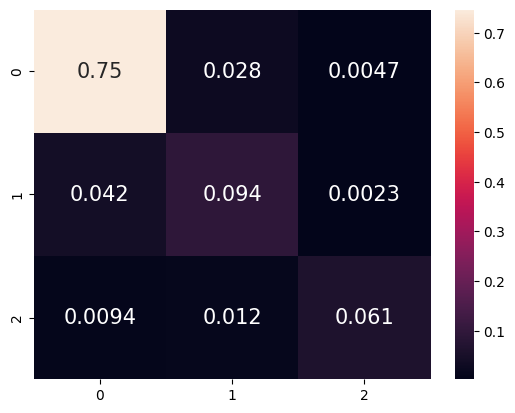

In [30]:
# matrice de confusion 
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(labels_test_selected, prediction_selected)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':15})

In [31]:
cf_matrix

array([[318,  12,   2],
       [ 18,  40,   1],
       [  4,   5,  26]], dtype=int64)

In [75]:
# Test en attribuant des couts

from sklearn.metrics import accuracy_score

def bayes_decision_rule(y_prob, C):

    # Calculer le risque bayésien pour chaque classe
    R = np.dot(C, y_prob)

    # Classe qui minimise le risque bayésien
    y_pred = np.argmin(R)

    return y_pred+1

# Matrice de couts
C = np.array([[0, 1, 5],  # couts pour un individu sain
              [1, 0, 1],  # couts pour un individu suspect
              [10, 5, 0]])  # couts pour un individu malade

clf_selected = KNeighborsClassifier(n_neighbors=best_n_neighbors)
clf_selected.fit(data_train_selected, labels_train_selected)

y_prob = clf_selected.predict_proba(data_test_selected)

prediction_selected = [bayes_decision_rule(y_prob[i], C) for i in range(len(y_prob))]
prediction_selected = pd.Categorical(prediction_selected, categories=[1.0, 2.0, 3.0], ordered=True)

print(classification_report(labels_test_selected, prediction_selected, target_names=['Normal', 'Suspect', 'Pathologic']))

print("Accuracy pour globale")
print(f"Score données d'entrainements: {clf_selected.score(data_train_selected, labels_train_selected)}")
print(f"Score données de test: {accuracy_score(labels_test_selected, prediction_selected)}")


print(confusion_matrix(labels_test_selected, prediction_selected))

              precision    recall  f1-score   support

      Normal       0.95      0.95      0.95       332
     Suspect       0.65      0.73      0.69        59
  Pathologic       0.93      0.71      0.81        35

    accuracy                           0.90       426
   macro avg       0.84      0.80      0.81       426
weighted avg       0.91      0.90      0.90       426

Accuracy pour globale
Score données d'entrainements: 0.9470588235294117
Score données de test: 0.9014084507042254
[[316  14   2]
 [ 16  43   0]
 [  1   9  25]]


Le nombre de foetus sains prédits sains et de foetus pathologiques prédits pathologique diminuent. Bien que cette diminution soit très faible (318 à 316 et 26 à 25) On aurait préféré que ce ne soit pas le cas. 

En revanche le nombre de foetus suspects prédits suspects augmente, ce qui est positif.

Surtout,  on divise par 4 le nombre de cas pathologiques prédit comme sains, ce qui était l'objectif principal de l'introduciton d'une matrice de couts

## Analyse discriminante

In [78]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [36]:
models = [
 (LinearDiscriminantAnalysis, "LDA"),
 (QuadraticDiscriminantAnalysis, "QDA"),
 (GaussianNB, "NB")]

def validation_errors(df, models):
   y = df['fetal_health']
   X = df.drop(columns=["fetal_health"])
   for model, name in models:
    for acc in cross_val_score(model(), X, y, cv=10):
        yield name, acc

In [37]:
data_selected = data_selected.drop(columns=["fetal_health"])

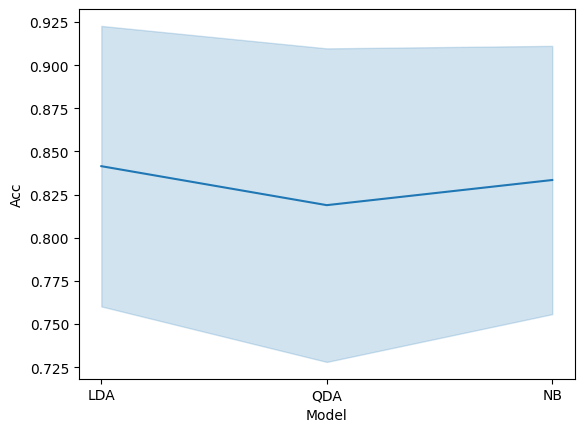

In [42]:
df = pd.DataFrame(validation_errors(data_selected, models), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, errorbar='sd')
plt.show()

In [26]:
# LDA Données brutes
lda = LinearDiscriminantAnalysis()
lda.fit(data_train, labels_train)
predicted_labels = lda.predict(data_test)
print(classification_report(labels_test, predicted_labels, target_names=['Normal', 'Suspect', 'Pathologic']))
print("Accuracy pour globale")
print(f"Score données d'entrainements: {lda.score(data_train, labels_train)}")
print(f"Score données de test: {lda.score(data_test, labels_test)}")

              precision    recall  f1-score   support

      Normal       0.92      0.93      0.93       332
     Suspect       0.52      0.56      0.54        59
  Pathologic       0.70      0.54      0.61        35

    accuracy                           0.85       426
   macro avg       0.71      0.68      0.69       426
weighted avg       0.85      0.85      0.85       426

Accuracy pour globale
Score données d'entrainements: 0.888235294117647
Score données de test: 0.8474178403755869


In [27]:
# LDA Séléction de variables
lda = LinearDiscriminantAnalysis()
lda.fit(data_train_selected, labels_train_selected)
predicted_labels = lda.predict(data_test_selected)
print(classification_report(labels_test_selected, predicted_labels, target_names=['Normal', 'Suspect', 'Pathologic']))
print("Accuracy pour globale")
print(f"Score données d'entrainements: {lda.score(data_train_selected, labels_train_selected)}")
print(f"Score données de test: {lda.score(data_test_selected, labels_test_selected)}")

              precision    recall  f1-score   support

      Normal       0.92      0.87      0.89       332
     Suspect       0.44      0.56      0.49        59
  Pathologic       0.56      0.57      0.56        35

    accuracy                           0.80       426
   macro avg       0.64      0.67      0.65       426
weighted avg       0.82      0.80      0.81       426

Accuracy pour globale
Score données d'entrainements: 0.8605882352941177
Score données de test: 0.823943661971831


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [34]:
# LDA Données brutes normalisées
pipeline_lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())
pipeline_lda.fit(data_train, labels_train)
predicted_labels = pipeline_lda.predict(data_test)
print(classification_report(labels_test, predicted_labels, target_names=['Normal', 'Suspect', 'Pathologic']))
print("Accuracy pour globale")
print(f"Score données d'entrainements: {pipeline_lda.score(data_train, labels_train)}")
print(f"Score données de test: {pipeline_lda.score(data_test, labels_test)}")

              precision    recall  f1-score   support

      Normal       0.92      0.93      0.93       332
     Suspect       0.52      0.56      0.54        59
  Pathologic       0.70      0.54      0.61        35

    accuracy                           0.85       426
   macro avg       0.71      0.68      0.69       426
weighted avg       0.85      0.85      0.85       426

Accuracy pour globale
Score données d'entrainements: 0.888235294117647
Score données de test: 0.8474178403755869


In [35]:
# LDA Séléction de variables + Normalisation
pipeline_lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())
pipeline_lda.fit(data_train_selected, labels_train_selected)
predicted_labels = pipeline_lda.predict(data_test_selected)
print(classification_report(labels_test_selected, predicted_labels, target_names=['Normal', 'Suspect', 'Pathologic']))
print("Accuracy pour globale")
print(f"Score données d'entrainements: {pipeline_lda.score(data_train_selected, labels_train_selected)}")
print(f"Score données de test: {pipeline_lda.score(data_test_selected, labels_test_selected)}")

              precision    recall  f1-score   support

      Normal       0.90      0.92      0.91       332
     Suspect       0.47      0.47      0.47        59
  Pathologic       0.65      0.49      0.56        35

    accuracy                           0.82       426
   macro avg       0.67      0.63      0.65       426
weighted avg       0.82      0.82      0.82       426

Accuracy pour globale
Score données d'entrainements: 0.8605882352941177
Score données de test: 0.823943661971831


In [28]:
# QDA Données Brutes
qda = QuadraticDiscriminantAnalysis()
qda.fit(data_train, labels_train)
predicted_labels = qda.predict(data_test)
print(classification_report(labels_test, predicted_labels, target_names=['Normal', 'Suspect', 'Pathologic']))
print("Accuracy pour globale")
print(f"Score données d'entrainements: {qda.score(data_train, labels_train)}")
print(f"Score données de test: {qda.score(data_test, labels_test)}")

              precision    recall  f1-score   support

      Normal       0.99      0.70      0.82       332
     Suspect       0.33      0.88      0.48        59
  Pathologic       0.65      0.63      0.64        35

    accuracy                           0.72       426
   macro avg       0.66      0.74      0.65       426
weighted avg       0.87      0.72      0.76       426

Accuracy pour globale
Score données d'entrainements: 0.73
Score données de test: 0.7206572769953051


c:\Users\Juliette\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [29]:
# QDA Séléction de variables
qda = QuadraticDiscriminantAnalysis()
qda.fit(data_train_selected, labels_train_selected)
predicted_labels = qda.predict(data_test_selected)
print(classification_report(labels_test_selected, predicted_labels, target_names=['Normal', 'Suspect', 'Pathologic']))
print("Accuracy pour globale")
print(f"Score données d'entrainements: {qda.score(data_train_selected, labels_train_selected)}")
print(f"Score données de test: {qda.score(data_test_selected, labels_test_selected)}")

              precision    recall  f1-score   support

      Normal       0.92      0.87      0.89       332
     Suspect       0.44      0.56      0.49        59
  Pathologic       0.56      0.57      0.56        35

    accuracy                           0.80       426
   macro avg       0.64      0.67      0.65       426
weighted avg       0.82      0.80      0.81       426

Accuracy pour globale
Score données d'entrainements: 0.8441176470588235
Score données de test: 0.8028169014084507


In [37]:
# QDA Données Brutes normalisées
pipeline_qda = make_pipeline(StandardScaler(),QuadraticDiscriminantAnalysis())
pipeline_qda.fit(data_train, labels_train)
predicted_labels = pipeline_qda.predict(data_test)
print(classification_report(labels_test, predicted_labels, target_names=['Normal', 'Suspect', 'Pathologic']))
print("Accuracy pour globale")
print(f"Score données d'entrainements: {pipeline_qda.score(data_train, labels_train)}")
print(f"Score données de test: {pipeline_qda.score(data_test, labels_test)}")

              precision    recall  f1-score   support

      Normal       0.99      0.58      0.74       332
     Suspect       0.28      0.97      0.44        59
  Pathologic       0.75      0.60      0.67        35

    accuracy                           0.64       426
   macro avg       0.68      0.72      0.61       426
weighted avg       0.88      0.64      0.69       426

Accuracy pour globale
Score données d'entrainements: 0.6364705882352941
Score données de test: 0.6384976525821596


c:\Users\Juliette\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [38]:
# QDA : séléction de variables + Normalisation
pipeline_qda = make_pipeline(StandardScaler(),QuadraticDiscriminantAnalysis())
pipeline_qda.fit(data_train_selected, labels_train_selected)
predicted_labels = pipeline_qda.predict(data_test_selected)
print(classification_report(labels_test_selected, predicted_labels, target_names=['Normal', 'Suspect', 'Pathologic']))
print("Accuracy pour globale")
print(f"Score données d'entrainements: {pipeline_qda.score(data_train_selected, labels_train_selected)}")
print(f"Score données de test: {pipeline_qda.score(data_test_selected, labels_test_selected)}")

              precision    recall  f1-score   support

      Normal       0.92      0.87      0.89       332
     Suspect       0.44      0.56      0.49        59
  Pathologic       0.56      0.57      0.56        35

    accuracy                           0.80       426
   macro avg       0.64      0.67      0.65       426
weighted avg       0.82      0.80      0.81       426

Accuracy pour globale
Score données d'entrainements: 0.8441176470588235
Score données de test: 0.8028169014084507


In [30]:
# NB Donées brutes
nb = GaussianNB()
nb.fit(data_train, labels_train)
predicted_labels = nb.predict(data_test)
print(classification_report(labels_test, predicted_labels, target_names=['Normal', 'Suspect', 'Pathologic']))
print("Accuracy pour globale")
print(f"Score données d'entrainements: {nb.score(data_train, labels_train)}")
print(f"Score données de test: {nb.score(data_test, labels_test)}")

              precision    recall  f1-score   support

      Normal       0.95      0.83      0.88       332
     Suspect       0.45      0.76      0.56        59
  Pathologic       0.60      0.60      0.60        35

    accuracy                           0.80       426
   macro avg       0.66      0.73      0.68       426
weighted avg       0.85      0.80      0.82       426

Accuracy pour globale
Score données d'entrainements: 0.8211764705882353
Score données de test: 0.8004694835680751


In [31]:
# NB Séléction de variables
nb = GaussianNB()
nb.fit(data_train_selected, labels_train_selected)
predicted_labels = nb.predict(data_test_selected)
print(classification_report(labels_test_selected, predicted_labels, target_names=['Normal', 'Suspect', 'Pathologic']))
print("Accuracy pour globale")
print(f"Score données d'entrainements: {nb.score(data_train_selected, labels_train_selected)}")
print(f"Score données de test: {nb.score(data_test_selected, labels_test_selected)}")

              precision    recall  f1-score   support

      Normal       0.93      0.89      0.91       332
     Suspect       0.51      0.63      0.56        59
  Pathologic       0.61      0.63      0.62        35

    accuracy                           0.83       426
   macro avg       0.68      0.72      0.70       426
weighted avg       0.85      0.83      0.84       426

Accuracy pour globale
Score données d'entrainements: 0.8552941176470589
Score données de test: 0.8333333333333334


In [39]:
# NB Donées brutes normalisées
pipeline_nb = make_pipeline(StandardScaler(),GaussianNB())
pipeline_nb.fit(data_train, labels_train)
predicted_labels = pipeline_nb.predict(data_test)
print(classification_report(labels_test, predicted_labels, target_names=['Normal', 'Suspect', 'Pathologic']))
print("Accuracy pour globale")
print(f"Score données d'entrainements: {pipeline_nb.score(data_train, labels_train)}")
print(f"Score données de test: {pipeline_nb.score(data_test, labels_test)}")

              precision    recall  f1-score   support

      Normal       0.99      0.69      0.81       332
     Suspect       0.34      0.92      0.50        59
  Pathologic       0.57      0.60      0.58        35

    accuracy                           0.71       426
   macro avg       0.63      0.74      0.63       426
weighted avg       0.87      0.71      0.75       426

Accuracy pour globale
Score données d'entrainements: 0.7341176470588235
Score données de test: 0.7136150234741784


In [40]:
# NB Séléction de variables + Normalisation
pipeline_nb = make_pipeline(StandardScaler(),GaussianNB())
pipeline_nb.fit(data_train_selected, labels_train_selected)
predicted_labels = pipeline_nb.predict(data_test_selected)
print(classification_report(labels_test_selected, predicted_labels, target_names=['Normal', 'Suspect', 'Pathologic']))
print("Accuracy pour globale")
print(f"Score données d'entrainements: {pipeline_nb.score(data_train_selected, labels_train_selected)}")
print(f"Score données de test: {pipeline_nb.score(data_test_selected, labels_test_selected)}")

              precision    recall  f1-score   support

      Normal       0.93      0.88      0.90       332
     Suspect       0.48      0.56      0.52        59
  Pathologic       0.52      0.63      0.57        35

    accuracy                           0.81       426
   macro avg       0.64      0.69      0.66       426
weighted avg       0.83      0.81      0.82       426

Accuracy pour globale
Score données d'entrainements: 0.8523529411764705
Score données de test: 0.8145539906103286


Les meilleures résultats sont obtenus avec LDA sans sélection de variables (avec ou sans normalisation).

Avec QDA et NB, la sélection de variable permet d'améliorer les performances, mais pas pour LDA.

La normalisation n'améliore jamais les performances (soit elle les dégrade soit ne change rien)

In [82]:
def bayes_decision_rule(y_prob, C):

    # Calculer le risque bayésien pour chaque classe
    R = np.dot(C, y_prob)

    # Classe qui minimise le risque bayésien
    y_pred = np.argmin(R)

    return y_pred+1

# Matrice de couts
C = np.array([[0, 1, 5],  # couts pour un individu sain
              [1, 0, 1],  # couts pour un individu suspect
              [10, 5, 0]])  # couts pour un individu malade

lda = LinearDiscriminantAnalysis()
lda.fit(data_train, labels_train)

predicted_labels = lda.predict_proba(data_test)

prediction = [bayes_decision_rule(predicted_labels[i], C) for i in range(len(predicted_labels))]
prediction = pd.Categorical(prediction, categories=[1.0, 2.0, 3.0], ordered=True)


print(classification_report(labels_test, prediction, target_names=['Normal', 'Suspect', 'Pathologic']))

print("Accuracy pour globale")
print(f"Score données d'entrainements: {lda.score(data_train, labels_train)}")
print(f"Score données de test: {accuracy_score(labels_test, prediction)}")


print(confusion_matrix(labels_test, prediction))


              precision    recall  f1-score   support

      Normal       0.92      0.93      0.93       332
     Suspect       0.49      0.58      0.53        59
  Pathologic       0.73      0.46      0.56        35

    accuracy                           0.84       426
   macro avg       0.71      0.65      0.67       426
weighted avg       0.85      0.84      0.84       426

Accuracy pour globale
Score données d'entrainements: 0.888235294117647
Score données de test: 0.8427230046948356
[[309  20   3]
 [ 22  34   3]
 [  4  15  16]]


Les résultats ne sont pas du tout aussi bon qu'avec knn. 

Non seulement les éléments diagonaux (bonnes prédictions) sont toutes inférieures, mais le nombre d'individus pathologiques prédits sains et multiplié par 4. 

## Régression logistique

In [61]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_reg = LogisticRegression(max_iter=300)

# Entraînement du modèle
log_reg.fit(data_train, labels_train)

# Prédictions
predicted_labels = log_reg.predict(data_test)

print(classification_report(labels_test, predicted_labels, target_names=['Normal', 'Suspect', 'Pathologic']))

              precision    recall  f1-score   support

      Normal       0.90      0.96      0.93       332
     Suspect       0.61      0.42      0.50        59
  Pathologic       0.85      0.80      0.82        35

    accuracy                           0.87       426
   macro avg       0.79      0.73      0.75       426
weighted avg       0.86      0.87      0.86       426



c:\Users\Juliette\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [26]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))
pipeline.fit(data_train, labels_train)

predicted_labels = pipeline.predict(data_test)

print(classification_report(labels_test, predicted_labels, target_names=['Normal', 'Suspect', 'Pathologic']))

              precision    recall  f1-score   support

      Normal       0.93      0.94      0.93       332
     Suspect       0.61      0.64      0.63        59
  Pathologic       0.82      0.66      0.73        35

    accuracy                           0.88       426
   macro avg       0.79      0.75      0.76       426
weighted avg       0.88      0.88      0.87       426



In [29]:
print("Accuracy pour globale")
print(f"Score données d'entrainements: {pipeline.score(data_train, labels_train)}")
print(f"Score données de test: {pipeline.score(data_test, labels_test)}")

Accuracy pour globale
Score données d'entrainements: 0.9070588235294118
Score données de test: 0.8755868544600939


<Axes: >

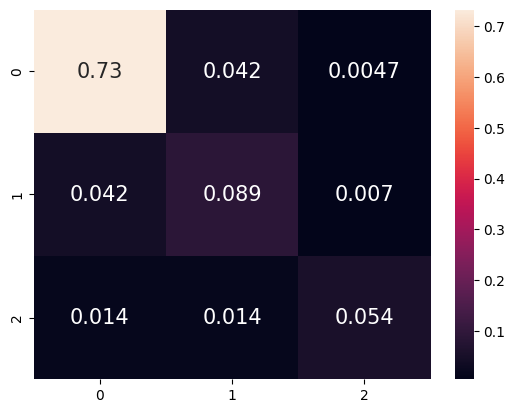

In [28]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(labels_test, predicted_labels)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':15})

On obtient de moins bons résultats qu'avec knn avec kopt.

Regardons si la selection de variable permet d'améliorer les scores

In [34]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))
pipeline.fit(data_train_selected, labels_train_selected)

predicted_labels = pipeline.predict(data_test_selected)

print(classification_report(labels_test_selected, predicted_labels, target_names=['Normal', 'Suspect', 'Pathologic']))

              precision    recall  f1-score   support

      Normal       0.90      0.94      0.92       332
     Suspect       0.56      0.41      0.47        59
  Pathologic       0.65      0.69      0.67        35

    accuracy                           0.84       426
   macro avg       0.70      0.68      0.68       426
weighted avg       0.83      0.84      0.83       426



In [35]:
print("Accuracy pour globale")
print(f"Score données d'entrainements: {pipeline.score(data_train_selected, labels_train_selected)}")
print(f"Score données de test: {pipeline.score(data_test_selected, labels_test_selected)}")

Accuracy pour globale
Score données d'entrainements: 0.8741176470588236
Score données de test: 0.8427230046948356


Les résultats sont moins bons avec sélection de variables. On reste sur des données brutes normalisées.

In [73]:
def bayes_decision_rule(y_prob, C):

    # Calculer le risque bayésien pour chaque classe
    R = np.dot(C, y_prob)

    # Classe qui minimise le risque bayésien
    y_pred = np.argmin(R)

    return y_pred+1

# Matrice de couts
C = np.array([[0, 1, 5],  # couts pour un individu sain
              [1, 0, 1],  # couts pour un individu suspect
              [10, 5, 0]])  # couts pour un individu malade

pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))
pipeline.fit(data_train, labels_train)

predicted_labels = pipeline.predict_proba(data_test)

prediction = [bayes_decision_rule(predicted_labels[i], C) for i in range(len(predicted_labels))]
prediction = pd.Categorical(prediction, categories=[1.0, 2.0, 3.0], ordered=True)


print(classification_report(labels_test, prediction, target_names=['Normal', 'Suspect', 'Pathologic']))

print("Accuracy pour globale")
print(f"Score données d'entrainements: {pipeline.score(data_train, labels_train)}")
print(f"Score données de test: {accuracy_score(labels_test, prediction)}")


print(confusion_matrix(labels_test, prediction))


              precision    recall  f1-score   support

      Normal       0.94      0.93      0.94       332
     Suspect       0.48      0.69      0.57        59
  Pathologic       1.00      0.43      0.60        35

    accuracy                           0.85       426
   macro avg       0.81      0.68      0.70       426
weighted avg       0.89      0.85      0.86       426

Accuracy pour globale
Score données d'entrainements: 0.9070588235294118
Score données de test: 0.8544600938967136
[[308  24   0]
 [ 18  41   0]
 [  0  20  15]]


Chaque element de la diagonale est inferieur à l'élément correspondant en utilisant les couts et l'algo knn.

Il y a tout de même un point positif : on a aucun cas pathologique prédit sain. 